## Do the Growing Deficits Indicate a Spending Problem, not a Revenue Problem?
On November 7, 2019, USA TODAY published an editorial by Kevin Brady titled [New tax cuts would lock in the gains: Rep. Kevin Brady](https://www.yahoo.com/news/tax-cuts-lock-gains-rep-234941385.html). It can be found on the USA TODAY web site at [this link](https://www.usatoday.com/story/opinion/2019/11/07/president-donald-trump-republicans-new-tax-cuts-gains-editorials-debates/2524364001/). In the editorial, Brady wrote the following:

> As a result, tax revenue is at an all-time high. You heard that right. According to the Treasury Department, total federal receipts are up more than 4% this year. The bottom line: Washington doesn’t have a revenue problem, it has a spending problem.

To investigate the validity of this statement, the following Python code reads the Monthly Treasury Statements for the [current issue](https://www.fiscal.treasury.gov/reports-statements/mts/current.html) and [previous issues](https://www.fiscal.treasury.gov/reports-statements/mts/previous.html) and plots the monthly receipts, oulays, and surplus/deficit starting in October of 2014.


Table 1. U.S. TREASURY RECEIPTS, OUTLAYS, AND DEFICITS: Monthly Amount ($billions)
            Total Receipts  Total Outlays  Surplus/Deficit
2014-10-01         212.719        334.432         -121.713
2014-11-01         191.436        248.254          -56.818
2014-12-01         335.327        333.463            1.864
2015-01-01         306.742        324.289          -17.546
2015-02-01         139.388        331.738         -192.350
...                    ...            ...              ...
2020-06-01         240.829       1104.903         -864.074
2020-07-01         563.496        626.487          -62.992
2020-08-01         223.221        423.233         -200.012
2020-09-01         373.169        497.780         -124.611
2020-10-01         237.698        521.769         -284.071

[73 rows x 3 columns]


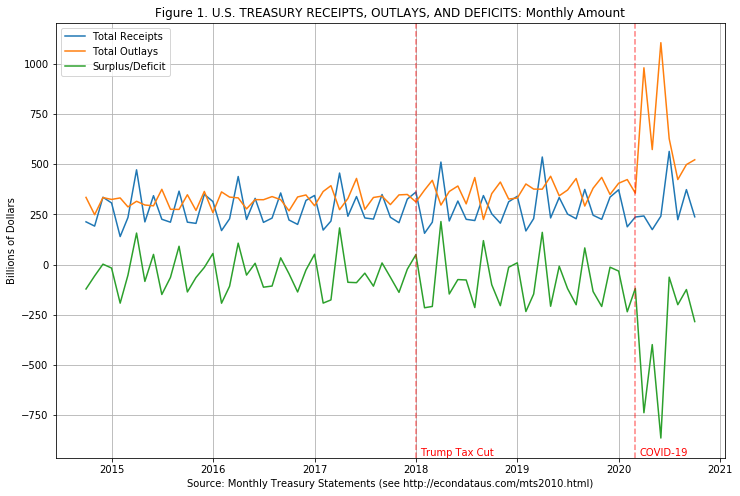

In [9]:
# Monthly Treasury Statement (MTS) - Current Issue:
# https://www.fiscal.treasury.gov/fsreports/rpt/mthTreasStmt/current.htm (before 11/30/2018)
# https://www.fiscal.treasury.gov/reports-statements/mts/current.html (new)
# Monthly Treasury Statement (MTS) - Previous Issues:
# https://www.fiscal.treasury.gov/fsreports/rpt/mthTreasStmt/backissues.htm (before 11/30/2018)
# https://www.fiscal.treasury.gov/reports-statements/mts/previous.html (new)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import os
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
pd.set_option('display.width', 120)
#pd.set_option('max_rows', 200)

# START OF VARIABLES TO UPDATE
month_index_last = 1 # 1 = October, 4 = January, 7 = April, 10 = July, 12 = September
year_last = 2021 # last fiscal year
yrmo_last = '2010'
moyr_last = '1020'
# variable for debts
cyear_last = 2020 # last calendar year
cmonth_last = 10 # 1 = January
debt_filename_last = 'mtsdebts_1704_2010.csv'
debt_filename_all  = 'mtsdebts_1503_2010.csv'
# (Note: manually update two Jupyter URLs and last month in final note below)
# Also, download CPIAUCNS.csv from https://fred.stlouisfed.org/series/CPIAUCNS to update CPI
# END OF VARIABLES TO UPDATE
savefig_recout     = "mts" + yrmo_last + "recout12m.png"
savefig_recout15   = "mts" + yrmo_last + "recout12m15.png"
savefig_recoutgdp  = "mts" + yrmo_last + "recout12mgdp.png"
savefig_rec15      = "mts" + yrmo_last + "rec12m15.png"
savefig_rec15norm  = "mts" + yrmo_last + "rec12m15norm.png"
savefig_recgdpnorm = "mts" + yrmo_last + "rec12mgdpnorm.png"
savefig_recoth15   = "mts" + yrmo_last + "recoth12m15.png"
savefig_def        = "mts" + yrmo_last + "def12m.png"
if os.path.isfile(savefig_recout):
    os.remove(savefig_recout) # Opt.: os.system("rm "+strFile)
if os.path.isfile(savefig_recout15):
    os.remove(savefig_recout15)
if os.path.isfile(savefig_recoutgdp):
    os.remove(savefig_recoutgdp)
if os.path.isfile(savefig_rec15):
    os.remove(savefig_rec15)
if os.path.isfile(savefig_rec15norm):
    os.remove(savefig_rec15norm)
if os.path.isfile(savefig_recgdpnorm):
    os.remove(savefig_recgdpnorm)
if os.path.isfile(savefig_recoth15):
    os.remove(savefig_recoth15)
if os.path.isfile(savefig_def):
    os.remove(savefig_def)
xlabel_last = "Source: Monthly Treasury Statements (see http://econdataus.com/mts" + yrmo_last + ".html)"
# For 1018, had to change extention from .xls to .xlsx
#xlsx_files_last = "https://www.fiscal.treasury.gov/files/reports-statements/mts/mts" + moyr_last + ".xlsx"
# For 0319, had to change extention from .xlsx to .xls - UPDATE IF NEEDED
# For 0419, had to change extention from .xls to .xlsx - UPDATE IF NEEDED
xlsx_files_last = "https://www.fiscal.treasury.gov/files/reports-statements/mts/mts" + moyr_last + ".xlsx"

xlsx_files_yr = [
    'https://www.fiscal.treasury.gov/files/reports-statements/mts/mts0915.xls',
    'https://www.fiscal.treasury.gov/files/reports-statements/mts/mts0916.xls',
    'https://www.fiscal.treasury.gov/files/reports-statements/mts/mts0917.xls',
    'https://www.fiscal.treasury.gov/files/reports-statements/mts/mts0918.xls',
    'https://www.fiscal.treasury.gov/files/reports-statements/mts/mts0919.xlsx', #UPDATE
    'https://www.fiscal.treasury.gov/files/reports-statements/mts/mts0920.xlsx', #UPDATE
    xlsx_files_last
]
def joinyear(year):
    iyr = year - 2015
    #print("BEFORE "+xlsx_files_yr[iyr]) #DEBUG
    xx = pd.read_excel(xlsx_files_yr[iyr], sheet_name='Table 7', index_col=0, skiprows=4)
    #print(" AFTER "+xlsx_files_yr[iyr]) #DEBUG
    if year == 2021 and month_index_last <= 12: # UPDATE for mts1020.xlsx
        xx = xx.iloc[[0,1,3,4,5,6,7,8,9,10,97,100], 0:12]
    elif year == 2020 and month_index_last == 1: # UPDATE for mts0920.xlsx # was >=
        xx = xx.iloc[[0,1,3,4,5,6,7,8,9,10,99,102], 0:12]
    elif year == 2020 and month_index_last < 4: # UPDATE for mts1019.xlsx
        xx = xx.iloc[[0,1,3,4,5,6,7,8,9,10,97,100], 0:12]
    elif year == 2020 and month_index_last == 9: # UPDATE for mts0920.xlsx # was >=
        xx = xx.iloc[[0,1,3,4,5,6,7,8,9,10,99,102], 0:12]
    elif year == 2020 and month_index_last >= 4: # UPDATE for mts2001.xlsx
        xx = xx.iloc[[0,1,3,4,5,6,7,8,9,10,98,101], 0:12]
    elif year < 2099: # fix required for mts1118.xls # was 2019
        xx = xx.iloc[[0,1,3,4,5,6,7,8,9,10,99,102], 0:12]
    else:
        #xx = xx.iloc[[0,1,3,4,5,6,7,8,9,10,97,100], 0:12]
        xx = xx.iloc[[0,1,3,4,5,6,7,8,9,10,98,101], 0:12] # UPDATE for mts0319.xls
    #print(year) #DEBUG
    #print(month_index_last) #DEBUG
    #print(xx) #DEBUG
    years = [year-1,year-1,year-1,year,year,year,year,year,year,year,year,year]
    months = ['10','11','12','01','02','03','04','05','06','07','08','09']
    #months = [10,11,12,1,2,3,4,5,6,7,8,9]
    for i in range(0,12):
        years[i] = str(years[i])+"-"+months[i]+"-01"
    xx.columns = pd.to_datetime(years)
    xx.index = ['Individual','Corporation','Employment','Unemployment','Other Retirement',
                'Excise','Estate','Customs','Miscellaneous','Total Receipts','Total Outlays','Surplus/Deficit']
    if year >= year_last:
        xx = xx.iloc[:, 0:month_index_last]
    #print(xx)
    return(xx)

def joinyears(start_year, end_year):
    yy = joinyear(2015)
    for year in range(start_year+1, end_year+1):
        yy = yy.join(joinyear(year))
    return(yy.T)

def dofilter(ff, numeric=True, rollingsum=False, normalize=False, divisor=1000, adjust=pd.Series([])):
    #print(yy)
    #print(yy.T)
    first = 0
    for i in range(0,len(ff.columns)):
        #print(ff.iloc[:,i]) #DEBUG
        if (numeric):
            ff.iloc[:,i] = ff.iloc[:,i].str.replace(',','').astype(int)
        if (len(adjust) > 0):
            ff.iloc[:,i] = ff.iloc[:,i].mul(adjust)
            #zz = zz.mul(deflators, axis='index')
        if (rollingsum):
            ff.iloc[:,i] = ff.iloc[:,i].rolling(window=12).sum()
            first = 11
        if (normalize):
            ff.iloc[:,i] = ff.iloc[:,i] - ff.iloc[first,i]
        ff.iloc[:,i] = ff.iloc[:,i]/divisor
    #yy = yy.T
    #yy = yy.iloc[:,9:]
    return(ff)

yy0 = joinyears(2015, year_last) # year_last gives error

yy = yy0.copy()
zz = dofilter(yy)
#zz = zz.mul(deflators, axis='index')
#print(zz)
# CPIAUCNS.csv was downloaded from https://fred.stlouisfed.org/series/CPIAUCNS
cpiu = pd.read_csv('CPIAUCNS.csv', index_col=0) # UPDATE CPIAUCNS.csv
CPIAUCNS = cpiu.loc['2014-10-01':,'CPIAUCNS']
cpi_deflators = CPIAUCNS[0] / CPIAUCNS

defs = zz.iloc[:,9:].copy()
print('Table 1. U.S. TREASURY RECEIPTS, OUTLAYS, AND DEFICITS: Monthly Amount ($billions)')
print(defs)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(defs)
ax.set_title('Figure 1. U.S. TREASURY RECEIPTS, OUTLAYS, AND DEFICITS: Monthly Amount')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Billions of Dollars')
ax.grid(zorder=0)
ytext=-950
ax.axvline(x='2018-1-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2018-1-15', y=ytext, s='Trump Tax Cut', color='red')
ax.axvline(x='2020-3-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2020-3-15', y=ytext, s='COVID-19', color='red')
ax.legend(defs.columns)

The reason for starting in October of 2014 is that this date is the start of fiscal year 2015, the first year for which the Treasury has spreadsheets posted on its site. In any event, the above plot clearly shows that receipts and surpluses peak in April of every year, presumedly due to taxpayers filing their returns. The plot also shows that the prior two months appeared to have had the largest monthly deficits since at least October of 2014. In fact, a [ZeroHedge article](https://www.zerohedge.com/news/2018-05-10/us-posts-biggest-budget-surplus-history) mentions that the "March budget deficit of \\$208.7 billion (in 2018) was 18% higher than $176.2BN deficit recorded last March (in 2017), and was the biggest March budget deficit in US history."

In order to remove the monthly variations that occur each year, it makes sense to look at the 12-month rolling sum of these values. That is done for receipts and outlays in the following Python code and the resulting plot.


Table 2. U.S. TREASURY RECEIPTS AND OUTLAYS: 12-Month Rolling Sum ($billions)
            Total Receipts  Total Outlays  % Chng Receipts  % Chng Outlays  Deflators
2014-10-01             NaN            NaN              NaN             NaN        1.0
2014-11-01             NaN            NaN              NaN             NaN        1.0
2014-12-01             NaN            NaN              NaN             NaN        1.0
2015-01-01             NaN            NaN              NaN             NaN        1.0
2015-02-01             NaN            NaN              NaN             NaN        1.0
...                    ...            ...              ...             ...        ...
2020-06-01        3113.410       6094.983        -8.342690       41.224610        1.0
2020-07-01        3425.558       6350.427         0.078355       44.830844        1.0
2020-08-01        3420.814       6345.351        -0.317974       44.878767        1.0
2020-09-01        3419.955       6551.871        -1.220035    

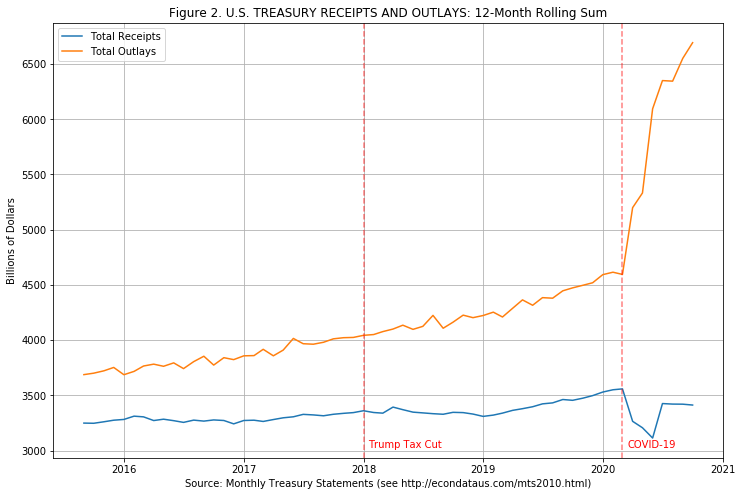

In [10]:
yy = yy0.copy()
allones = cpi_deflators.copy()
for i in range(len(allones)):
    allones[i] = 1
deflators = allones
zz = dofilter(yy, rollingsum=True, normalize=False, adjust=deflators)
#zz = zz.mul(deflators, axis='index')
dd = zz.iloc[:,9:11].copy()
#print(dd)
dd['% Chng Receipts'] = dd['Total Receipts'].pct_change(periods=12) * 100
dd['% Chng Outlays']  = dd['Total Outlays'].pct_change(periods=12) * 100
dd['Deflators']  = deflators
#dd.loc[:1] = dd[:1] * cpiu[0:3] / cpiu[:3]
#dd.loc[:2] = dd[:2] * cpiu[0:3] / cpiu[:3]
#dd.loc[:3] = dd[:3] * cpiu[0:3] / cpiu[:3]
print('Table 2. U.S. TREASURY RECEIPTS AND OUTLAYS: 12-Month Rolling Sum ($billions)')
print(dd)
dd = dd.iloc[:,0:2]
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(dd)
ax.set_title('Figure 2. U.S. TREASURY RECEIPTS AND OUTLAYS: 12-Month Rolling Sum')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Billions of Dollars')
ax.grid(zorder=0)
ytext=3030
ax.axvline(x='2018-1-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2018-1-15', y=ytext, s='Trump Tax Cut', color='red')
ax.axvline(x='2020-3-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2020-3-15', y=ytext, s='COVID-19', color='red')
ax.legend(dd.columns)
fig.savefig(savefig_recout)

The fourth column above shows the increase in the 12-month rolling receipts over the prior 12-month period. Hence, the 4.009018 for 2019-09-01 shows that receipts did increase more than 4 percent in fiscal year 2019 as Brady said (though just barely so). However, the 0.417872 for 2018-09-01 shows that receipts increased less than half of one percent in fiscal year 2018. In addition, these numbers are not corrected for inflation. The following code is the same as above except that the receipts and outlays are all corrected for inflation using the CPI-U from the [Federal Reserve web site](https://fred.stlouisfed.org/series/CPIAUCNS).


             Individual  Corporation   Employment  Unemployment  Other Retirement     Excise     Estate    Customs  \
2014-10-01          NaN          NaN          NaN           NaN               NaN        NaN        NaN        NaN   
2014-11-01          NaN          NaN          NaN           NaN               NaN        NaN        NaN        NaN   
2014-12-01          NaN          NaN          NaN           NaN               NaN        NaN        NaN        NaN   
2015-01-01          NaN          NaN          NaN           NaN               NaN        NaN        NaN        NaN   
2015-02-01          NaN          NaN          NaN           NaN               NaN        NaN        NaN        NaN   
...                 ...          ...          ...           ...               ...        ...        ...        ...   
2020-06-01  1293.056392   145.947260  1146.984295     38.300125          4.749272  68.691594  14.212349  66.365123   
2020-07-01  1517.038389   201.805013  1150.563422     38

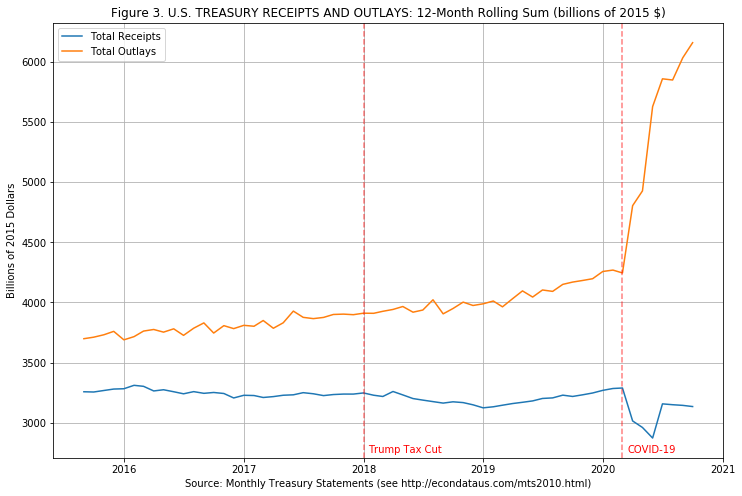

In [11]:
yy = yy0.copy()
deflators = cpi_deflators
zz = dofilter(yy, rollingsum=True, normalize=False, adjust=deflators)
print(zz) #DEBUG
#zz = zz.mul(deflators, axis='index')
dd = zz.iloc[:,9:11].copy()
#print(dd)
dd['% Chng Receipts'] = dd['Total Receipts'].pct_change(periods=12) * 100
dd['% Chng Outlays']  = dd['Total Outlays'].pct_change(periods=12) * 100
dd['Deflators']  = deflators
#dd.loc[:1] = dd[:1] * cpiu[0:3] / cpiu[:3]
#dd.loc[:2] = dd[:2] * cpiu[0:3] / cpiu[:3]
#dd.loc[:3] = dd[:3] * cpiu[0:3] / cpiu[:3]
print('Table 3. U.S. TREASURY RECEIPTS AND OUTLAYS: 12-Month Rolling Sum (billions of 2015 $)')
print(dd)
dd = dd.iloc[:,0:2]
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(dd)
ax.set_title('Figure 3. U.S. TREASURY RECEIPTS AND OUTLAYS: 12-Month Rolling Sum (billions of 2015 $)')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Billions of 2015 Dollars')
ax.grid(zorder=0)
ytext=2750
ax.axvline(x='2018-1-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2018-1-15', y=ytext, s='Trump Tax Cut', color='red')
ax.axvline(x='2020-3-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2020-3-15', y=ytext, s='COVID-19', color='red')
ax.legend(dd.columns)
fig.savefig(savefig_recout15)

As can be seen in the graph above, real receipts generally declined following a local high reached in April of 2018 to the start of 2019. They then started to recover but have not yet reached that high of April of 2018. This is in fact the month of the last year that individual taxes were paid under the old tax rules. The fourth column above shows that real (inflation-corrected) receipts went down over 1.9 percent in fiscal year 2018 and rose just over 2 percent in fiscal year 2019. As a result, they are just about even over two years and down 1.26 percent from the high in April of 2018.

The fifth column shows that real outlays increased just 0.77 percent in fiscal year 2018 but 6.27 percent in fiscal year 2019. Combining those, real outlays have increased 3.09 percent at an annual rate over the last two fiscal years.

However, receipts and outlays have tended to rise with the GDP over the last 60 or more years. The following code is the same as above except that the receipts and outlays are all taken as a percent of GDP as shown at the [Bureau of Economic Analysis](https://www.bea.gov/national/xls/gdplev.xlsx) web site. Since the BEA site shows quarterly GDP numbers, those numbers are applied to the corresponding months in the receipts and outlays numbers. For example, the GDP number for quarter 4 of 2014 is used for October, November, and December of 2014. Also, if the GDP number is not yet available, it is estimated by assuming that the GDP will grow by the same amount as the last recorded quarter.

In [12]:
#import pandas as pd
# pd.read_excel does not work for 2018Q3 and later - save and convert file to CSV
#xx = pd.read_excel('https://www.bea.gov/national/xls/gdplev.xlsx', skiprows=7)
#xx = pd.read_excel('gdplev.xlsx', skiprows=7) #UPDATE - Save GDP file locally
xx = pd.read_excel('gdplev_19q3.xlsx', skiprows=7) #UPDATE - Save GDP file locally
#xx = pd.read_csv('gdplev.csv', skiprows=7) #UPDATE - Save GDP file locally as a CSV file

aa = xx.iloc[0:90, 0:3] #UPDATE (0:90 = 2018, 90 = 98(row in file) - 7(skiprows) - 1(hdr))
aa.columns = ['Year','Current $bil','Chained 2009 $bil']
qq = xx.iloc[0:291, 4:7] #UPDATE (0:291 = 2019Q3, 289 = 297(row in file - 7(skiprows) - 1(hdr))
qq.columns = ['Quarter','Current $bil','Chained 2009 $bil']
# Must convert strings to floats if read from CSV file (comment out values are already floats)
#aa['Chained 2009 $bil'] = aa['Chained 2009 $bil'].str.replace(',', '')
#qq['Chained 2009 $bil'] = qq['Chained 2009 $bil'].str.replace(',', '')
#aa['Chained 2009 $bil'] = aa['Chained 2009 $bil'].astype(float)
#qq['Chained 2009 $bil'] = qq['Chained 2009 $bil'].astype(float)

aa['Pct_Change'] = aa.loc[:,'Chained 2009 $bil'].pct_change()*100
qq['Pct_Change'] = qq.loc[:,'Chained 2009 $bil'].pct_change()*100
#print(qq.head())
#print(qq.tail(23))
qq14q4 = qq.iloc[271:,]
#qq14q4['deflator'] = 100 / qq14q4['Current $bil'] #TEST
#print(qq14q4)
gdp_deflators = cpi_deflators.copy()
gdp_deflator_est = 2*qq14q4.iloc[len(qq14q4)-1, 1] - qq14q4.iloc[len(qq14q4)-2, 1] # ESTIMATE NEXT GDP - UNCOMMENT
gdp_deflators[:] = 100 / gdp_deflator_est # USE NEXT ESTIMATED GDP
#gdp_deflators[:] = 100 / qq14q4.iloc[len(qq14q4)-1, 1] # USE LAST ACTUAL GDP
#gdp_deflators.rename('GDP')
#gdp_deflators.rename(columns = {'CPIAUCNS':'GDP'}, inplace = True) 
j = 0
for i in range(len(qq14q4)):
    gdp_deflators[j]   = 100 / qq14q4.iloc[i,1]
    gdp_deflators[j+1] = 100 / qq14q4.iloc[i,1]
    gdp_deflators[j+2] = 100 / qq14q4.iloc[i,1]
    j = j+3
#print(type(gdp_deflators))
#print(gdp_deflators)

Table 4. U.S. TREASURY RECEIPTS AND OUTLAYS: 12-Month Rolling Sum (percent of GDP)
            Total Receipts  Total Outlays  % Chng Receipts  % Chng Outlays  Deflators
2014-10-01             NaN            NaN              NaN             NaN   0.005602
2014-11-01             NaN            NaN              NaN             NaN   0.005602
2014-12-01             NaN            NaN              NaN             NaN   0.005602
2015-01-01             NaN            NaN              NaN             NaN   0.005560
2015-02-01             NaN            NaN              NaN             NaN   0.005560
...                    ...            ...              ...             ...        ...
2020-06-01       14.354852      28.076817       -11.051316       36.830870   0.004599
2020-07-01       15.779516      29.235542        -2.712548       40.652405   0.004599
2020-08-01       15.747859      29.193711        -2.921040       41.128970   0.004599
2020-09-01       15.727764      30.130887        -3.52374

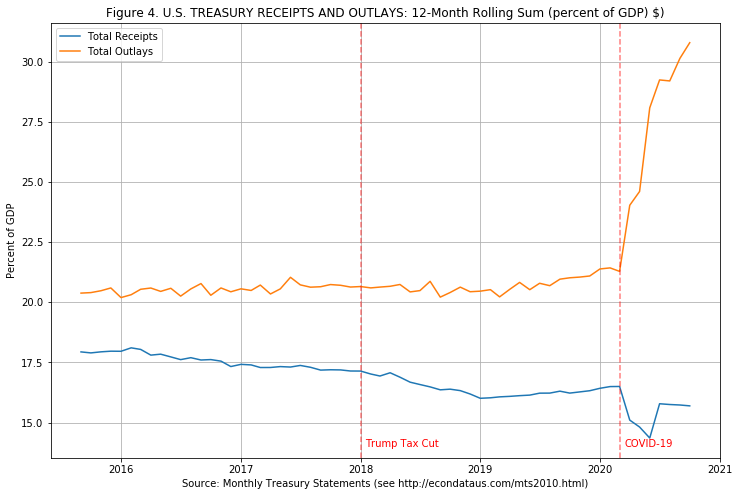

In [13]:
yy = yy0.copy()
deflators = gdp_deflators
zz = dofilter(yy, rollingsum=True, normalize=False, adjust=deflators)
#zz = zz.mul(deflators, axis='index')
dd = zz.iloc[:,9:11].copy()
#print(dd)
dd['% Chng Receipts'] = dd['Total Receipts'].pct_change(periods=12) * 100
dd['% Chng Outlays']  = dd['Total Outlays'].pct_change(periods=12) * 100
dd['Deflators']  = deflators
#dd.loc[:1] = dd[:1] * cpiu[0:3] / cpiu[:3]
#dd.loc[:2] = dd[:2] * cpiu[0:3] / cpiu[:3]
#dd.loc[:3] = dd[:3] * cpiu[0:3] / cpiu[:3]
print('Table 4. U.S. TREASURY RECEIPTS AND OUTLAYS: 12-Month Rolling Sum (percent of GDP)')
print(dd)
dd = dd.iloc[:,0:2]
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(dd)
ax.set_title('Figure 4. U.S. TREASURY RECEIPTS AND OUTLAYS: 12-Month Rolling Sum (percent of GDP) $)')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Percent of GDP')
ax.grid(zorder=0)
ytext=14
ax.axvline(x='2018-1-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2018-1-15', y=ytext, s='Trump Tax Cut', color='red')
ax.axvline(x='2020-3-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2020-3-15', y=ytext, s='COVID-19', color='red')
ax.legend(dd.columns)
fig.savefig(savefig_recoutgdp)

Surprisingly, outlays appear to have remained fairly steady as a percent of GDP. They have run between 20 and 21 percent of GDP since at least October of 2014 though they did just reach 21.035 percent in October of 2019. During that same period, receipts have dropped from about 18 percent of GDP to just above 16 percent of GDP. Of course, it can be argued that both receipts and outlays need to be restrained to deal with the growing deficit. However, judging strictly be their percent of GDP, receipts have been a bigger contributor to the growing deficit, at least until the past few months.

Focusing on the receipts, the following Python code plots the 12-month rolling sum of the three largest contributors to real receipts. Those are individual income taxes, corporation income taxes, and employment taxes. Employment taxes consist chiefly of payroll taxes.

Table 5. SOURCES OF U.S. TREASURY RECEIPTS: 12-Month Rolling Sum (billions of 2015 $)
             Individual  Corporation   Employment       Other  Deflators
2015-09-01  1542.159582   343.814550  1011.371620  353.831135   0.997848
2015-10-01  1545.222353   338.000162  1015.681386  351.708725   0.998297
2015-11-01  1555.722295   339.794006  1022.026423  352.527070   1.000409
2015-12-01  1563.716869   333.024039  1028.256177  368.235122   1.003839
2016-01-01  1562.741036   332.105401  1029.470470  366.115865   1.002182
...                 ...          ...          ...         ...        ...
2020-06-01  1190.914783   134.418538  1056.381269  265.132997   0.921008
2020-07-01  1390.172079   184.928540  1054.344541  264.122771   0.916372
2020-08-01  1370.877910   187.269795  1053.905048  265.970619   0.913492
2020-09-01  1348.997114   177.451989  1059.213704  283.375607   0.912221
2020-10-01  1332.527650   179.459799  1063.563152  283.380256   0.911843

[62 rows x 5 columns]


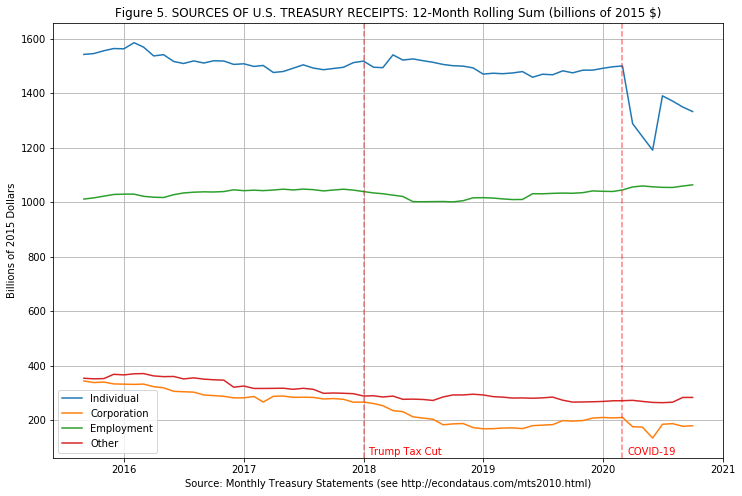

In [14]:
yy = yy0.copy()
deflators = cpi_deflators
zz = dofilter(yy, rollingsum=True, normalize=False, adjust=deflators)
zz = zz.mul(deflators, axis='index')
dd = zz.iloc[:,0:3].copy()
oo = zz.iloc[:,3:9]
dd['Other'] = oo.sum(axis=1, skipna=False)
dd['Deflators']  = deflators
print('Table 5. SOURCES OF U.S. TREASURY RECEIPTS: 12-Month Rolling Sum (billions of 2015 $)')
print(dd.iloc[11:,:])
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
dd = dd.iloc[:,0:4]
ax.plot(dd)
ax.set_title('Figure 5. SOURCES OF U.S. TREASURY RECEIPTS: 12-Month Rolling Sum (billions of 2015 $)')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Billions of 2015 Dollars')
ax.grid(zorder=0)
ytext=75
ax.axvline(x='2018-1-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2018-1-15', y=ytext, s='Trump Tax Cut', color='red')
ax.axvline(x='2020-3-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2020-3-15', y=ytext, s='COVID-19', color='red')
ax.legend(dd.columns)
fig.savefig(savefig_rec15)

The fact that individual tax receipts are so much greater than corporate tax receipts makes it difficult to see the detail of the change in each. Following is the same Python code but with normalize set to True. This normalizes all sources of receipts to start at zero.

Table 6. SOURCES OF U.S. TREASURY RECEIPTS: Real Change in 12-Month Rolling Sum (billions of 2015 $)
            Individual  Corporation  Employment      Other  Deflators
2015-09-01    0.000000     0.000000    0.000000   0.000000   0.997848
2015-10-01    2.368975    -5.969066    3.854764  -2.281594   0.998297
2015-11-01    9.605558    -4.902766    8.059642  -2.211990   1.000409
2015-12-01   12.298787   -12.854634   10.812693  12.279728   1.003839
2016-01-01   13.883375   -13.202442   13.706149  10.747931   1.002182
...                ...          ...         ...        ...        ...
2020-06-01 -232.488755  -182.920117  122.891663 -61.450902   0.921008
2020-07-01  -26.067773  -130.813017  125.552989 -60.817501   0.916372
2020-08-01  -40.910277  -127.479291  128.032965 -57.948269   0.913492
2020-09-01  -60.827543  -136.859341  134.629333 -40.092771   0.912221
2020-10-01  -76.712261  -134.721166  139.362268 -39.953958   0.911843

[62 rows x 5 columns]


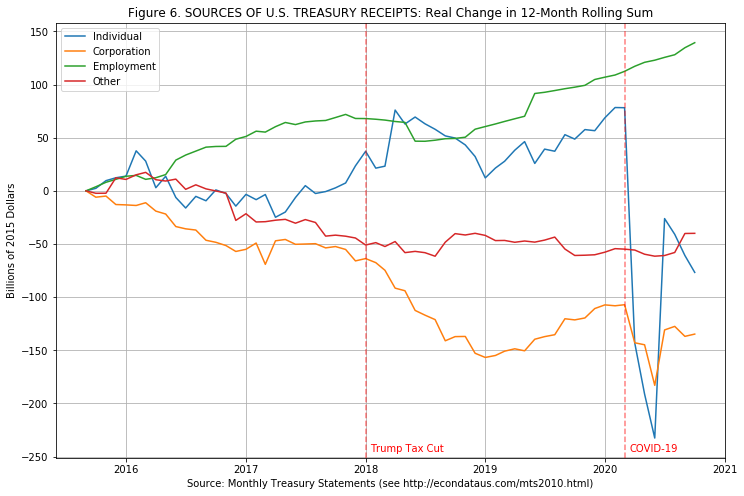

In [15]:
yy = yy0.copy()
deflators = cpi_deflators
zz = dofilter(yy, rollingsum=True, normalize=True, adjust=deflators)
zz = zz.mul(deflators, axis='index')
dd = zz.iloc[:,0:3].copy()
oo = zz.iloc[:,3:9]
dd['Other'] = oo.sum(axis=1, skipna=False)
dd['Deflators']  = deflators
print('Table 6. SOURCES OF U.S. TREASURY RECEIPTS: Real Change in 12-Month Rolling Sum (billions of 2015 $)')
print(dd.iloc[11:,:])
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
dd = dd.iloc[:,0:4]
ax.plot(dd)
ax.set_title('Figure 6. SOURCES OF U.S. TREASURY RECEIPTS: Real Change in 12-Month Rolling Sum')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Billions of 2015 Dollars')
ax.grid(zorder=0)
ytext=-245
ax.axvline(x='2018-1-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2018-1-15', y=ytext, s='Trump Tax Cut', color='red')
ax.axvline(x='2020-3-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2020-3-15', y=ytext, s='COVID-19', color='red')
ax.legend(dd.columns)
fig.savefig(savefig_rec15norm)

As can be seen, real yearly individual income tax receipts have dropped a bit since the high reached in April of 2018, under the old tax rules. Real yearly employment tax receipts have risen slightly and real yearly corporation tax receipts have dropped sharply. It is interesting to note that most of the drop in corporation tax receipts have occurred since the passage of the Tax Cuts and Jobs Act of 2017 so that may be the most visible effect of the tax bill on receipts. The surge in individual tax receipts in April of 2018 likely has little to do with the tax bill since the taxes paid in April are based on the prior tax law. Regarding individual tax receipts, the Washington Times article does say the following:

> Analysts said they’ll have a better idea of what’s behind the surge as more information rolls in, but for now said it looks like individual taxpayers are paying more because they have higher incomes.

> “Those payments were mostly related to economic activity in 2017 and may reflect stronger-than-expected income growth in that year,” the analysts said in their monthly budget review. “Part of the strength in receipts also may reflect larger-than-anticipated payments for economic activity in 2018. The reasons for the added revenues will be better understood as more detailed information becomes available later this year.”

The following Python code likewise normalizes all sources of receipts to start at zero. However, it adjusts the data to the percent of GDP rather than the CPI rate.

Table 7. SOURCES OF U.S. TREASURY RECEIPTS: Change in 12-Month Rolling Sum (percent of GDP)
            Individual  Corporation  Employment     Other  Deflators
2015-09-01    0.000000     0.000000    0.000000  0.000000   0.005451
2015-10-01   -0.000013    -0.000186    0.000060 -0.000088   0.005449
2015-11-01    0.000143    -0.000156    0.000132 -0.000104   0.005449
2015-12-01    0.000132    -0.000441    0.000167  0.000304   0.005449
2016-01-01    0.000122    -0.000453    0.000221  0.000250   0.005428
...                ...          ...         ...       ...        ...
2020-06-01   -0.009392    -0.005370    0.000670 -0.002367   0.004599
2020-07-01   -0.004222    -0.004081    0.000753 -0.002358   0.004599
2020-08-01   -0.004591    -0.004007    0.000833 -0.002288   0.004599
2020-09-01   -0.005082    -0.004245    0.001015 -0.001833   0.004599
2020-10-01   -0.005455    -0.004190    0.001158 -0.001824   0.004599

[62 rows x 5 columns]


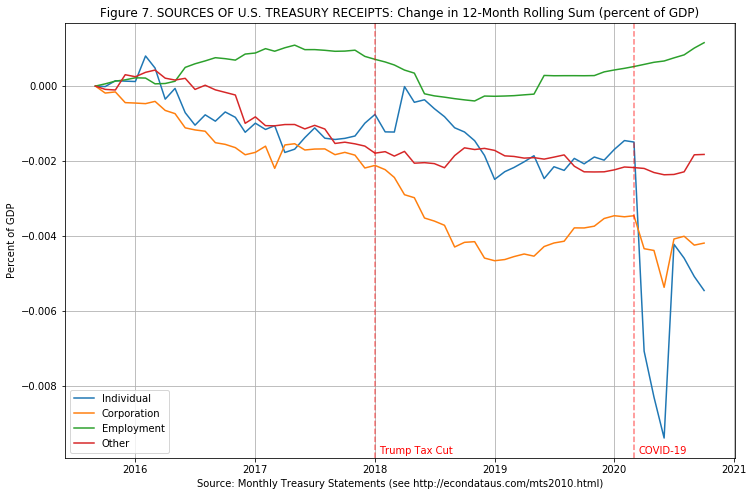

In [16]:
yy = yy0.copy()
deflators = gdp_deflators
zz = dofilter(yy, rollingsum=True, normalize=True, adjust=deflators)
zz = zz.mul(deflators, axis='index')
dd = zz.iloc[:,0:3].copy()
oo = zz.iloc[:,3:9]
dd['Other'] = oo.sum(axis=1, skipna=False)
dd['Deflators']  = deflators
print('Table 7. SOURCES OF U.S. TREASURY RECEIPTS: Change in 12-Month Rolling Sum (percent of GDP)')
print(dd.iloc[11:,:])
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
dd = dd.iloc[:,0:4]
ax.plot(dd)
ax.set_title('Figure 7. SOURCES OF U.S. TREASURY RECEIPTS: Change in 12-Month Rolling Sum (percent of GDP)')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Percent of GDP')
ax.grid(zorder=0)
ytext=-0.0098
ax.axvline(x='2018-1-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2018-1-15', y=ytext, s='Trump Tax Cut', color='red')
ax.axvline(x='2020-3-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2020-3-15', y=ytext, s='COVID-19', color='red')
ax.legend(dd.columns)
fig.savefig(savefig_recgdpnorm)

As can be seen, yearly individual income tax receipts have dropped since the high reached in April of 2018, under the old tax rules, to a level below where they were prior to the tax cut. Yearly employment tax receipts is the only source of receipts that have remained fairly steady as a percent of GDP. However, yearly corporation tax receipts have dropped sharply. In any event, the following Python code shows the real 12-month rolling sum of the other contributors to receipts.

Table 8. OTHER SOURCES OF U.S. TREASURY RECEIPTS: 12-Month Rolling Sum (billions of 2015 $)
            Unemployment  Other Retirement     Excise     Estate    Customs  Miscellaneous
2015-09-01     51.183575          3.653813  98.256777  19.250820  35.066480     146.419670
2015-10-01     50.173692          3.672897  97.954076  19.968640  35.026502     144.912917
2015-11-01     51.880997          3.697279  98.422997  20.208471  35.008640     143.308686
2015-12-01     51.622942          3.793515  98.869395  20.462656  35.208930     158.277684
2016-01-01     51.196673          3.742419  98.044499  20.336027  35.133237     157.663011
...                  ...               ...        ...        ...        ...            ...
2020-06-01     35.274707          4.374116  63.265481  13.089682  61.122784      88.006228
2020-07-01     34.973773          4.355276  61.503078  14.452687  59.535548      89.302409
2020-08-01     34.736562          4.347206  61.045215  14.018745  58.346431      93.47646

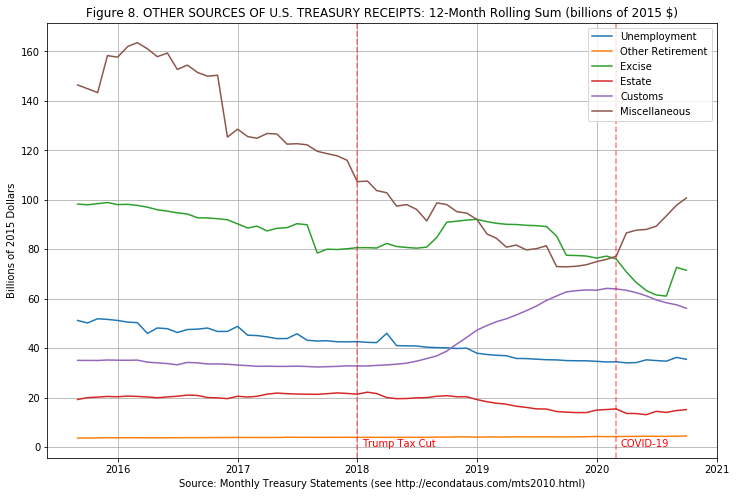

In [17]:
yy = yy0.copy()
deflators = cpi_deflators
zz = dofilter(yy, rollingsum=True, normalize=False, adjust=deflators)
zz = zz.mul(deflators, axis='index')
dd = zz.iloc[:,3:9]
print('Table 8. OTHER SOURCES OF U.S. TREASURY RECEIPTS: 12-Month Rolling Sum (billions of 2015 $)')
print(dd.iloc[11:,:])
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(dd)
ax.set_title('Figure 8. OTHER SOURCES OF U.S. TREASURY RECEIPTS: 12-Month Rolling Sum (billions of 2015 $)')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Billions of 2015 Dollars')
ax.grid(zorder=0)
ytext=0
ax.axvline(x='2018-1-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2018-1-15', y=ytext, s='Trump Tax Cut', color='red')
ax.axvline(x='2020-3-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2020-3-15', y=ytext, s='COVID-19', color='red')
ax.legend(dd.columns)
fig.savefig(savefig_recoth15)

As can be seen, real yearly receipts from excise taxes and other retirement taxes remained fairly flat. Real yearly receipts from estate taxes remained fairly flat until this year, when they started to decrease. This is likely due to the increase in the exemption under the 2017 tax cut Real yearly receipts from unemployment taxes have decreased slightly but receipts for miscellaneous sources have dropped sharply, being cut about in half since there high in early 2016. The one source of otehr receipts that has risen is real yearly receipts from custom taxes. This is likely due to the increased trade tariffs under Trump.

Due to the incresing gap between receipts and outlays, the deficit is continuing to grow. The following Python code plots the increase the 12-month rolling sum of the deficit.

Table 9. U.S. TREASURY SURPLUS/DEFICIT(-): 12-Month Rolling Sum ($billions)
            Surplus/Deficit
2015-09-01         -438.899
2015-10-01         -453.744
2015-11-01         -461.475
2015-12-01         -477.783
2016-01-01         -405.074
...                     ...
2020-06-01        -2981.573
2020-07-01        -2924.870
2020-08-01        -2924.538
2020-09-01        -3131.917
2020-10-01        -3281.521

[62 rows x 1 columns]


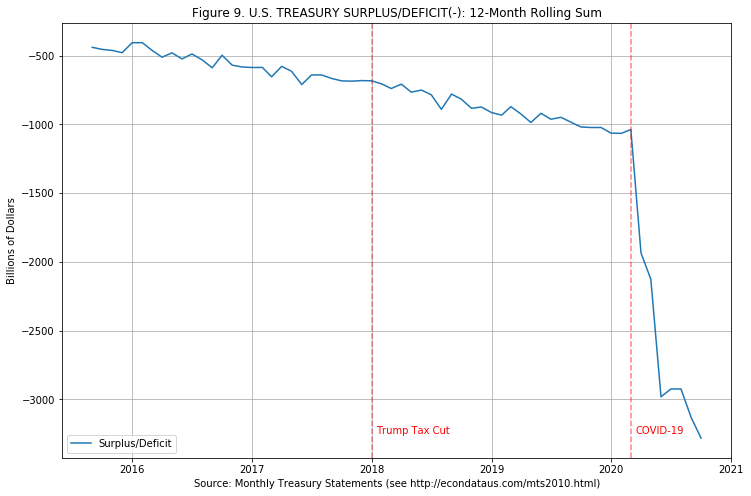

In [18]:
yy = yy0.copy()
zz = dofilter(yy, rollingsum=True)
#zz = zz.mul(deflators, axis='index')
dd = zz.iloc[:,[11]]
print('Table 9. U.S. TREASURY SURPLUS/DEFICIT(-): 12-Month Rolling Sum ($billions)')
print(dd.iloc[11:,:])
#pd.set_option('display.max_rows', 100)
#print(dd)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(dd)
ax.set_title('Figure 9. U.S. TREASURY SURPLUS/DEFICIT(-): 12-Month Rolling Sum')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Billions of Dollars')
ax.grid(zorder=0)
ytext=-3250
ax.axvline(x='2018-1-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2018-1-15', y=ytext, s='Trump Tax Cut', color='red')
ax.axvline(x='2020-3-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2020-3-15', y=ytext, s='COVID-19', color='red')
ax.legend(dd.columns)
fig.savefig(savefig_def)

As can be seen, the annual deficit has increased from just under \\$600 billion per year when Trump took office to just over a trillion dollars per year now.

#### Looking at the Change in the Debt

On February 13, 2019, CNSNews.com released a story titled [\\$1,665,484,000,000: Feds Collect Record Individual Income Taxes in Calendar 2018--as Debt Climbed \\$1,481,349,159,596.80](https://www.cnsnews.com/news/article/terence-p-jeffrey/1665484000000-feds-collect-record-individual-income-taxes-calendar). It states:

> At the same time the Treasury was collecting record individual income taxes, the federal debt was climbing from \\$20,492,746,546,193.75 at the close of 2017 to \\$21,974,095,705,790.55 at the close of 2018. That was a one-year increase of \\$1,481,349,159,596.80.

In order to verify these numbers, the following code takes data from the Monthly Treasury Statements since September of 2014.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

def joinyear6(month, year):
    yr = year % 100
    smo = ['00','01','02','03','04','05','06','07','08','09','10','11','12']
    filetype = '.xls'
    if year <= 2015 and month <= 4:
        filetype = '.xlsx'
    if year == 2016 and month == 2:
        filetype = '.xlsx'
    if year == 2018 and month == 7:
        filetype = '.xlsx'
    if year == 2018 and month >= 10:
        filetype = '.xlsx'
    if year == 2019 and month <= 2: # UPDATE IF NEEDED
        filetype = '.xlsx'
    if year == 2019 and month >= 4: # UPDATE IF NEEDED
        filetype = '.xlsx'
    if year >= 2020: # UPDATE IF NEEDED
        filetype = '.xlsx'
    filepath = "https://www.fiscal.treasury.gov/files/reports-statements/mts/mts"+smo[month]+str(yr)+filetype
    print("BEFORE "+filepath)
    if year < 2017:
        xx = pd.read_excel(filepath, sheet_name='Table 6', index_col=0, skiprows=6)
    elif year == 2017 and month <= 3:
        xx = pd.read_excel(filepath, sheet_name='Table 6', index_col=0, skiprows=6)
    elif year == 2018 and month == 11:
        xx = pd.read_excel(filepath, sheet_name='Table 6', index_col=0, skiprows=6)
    elif year == 2019 and month >= 2 and month <= 3: # change >= 2019 to == 2019 (here and in next case)
        xx = pd.read_excel(filepath, sheet_name='Table 6', index_col=0, skiprows=6)
    elif year == 2019 and month >= 11 and month <= 11: # Debt Held by the Public on line 12 -> skiprows=6
        xx = pd.read_excel(filepath, sheet_name='Table 6', index_col=0, skiprows=6)
    elif year == 2020 and month >= 1 and month <= 12: # Debt Held by the Public on line 11 -> skiprows=5 DUP
        xx = pd.read_excel(filepath, sheet_name='Table 6', index_col=0, skiprows=5)
    else: # Debt Held by the Public on line 11 -> skiprows=5 - UPDATE IF NEEDED
        xx = pd.read_excel(filepath, sheet_name='Table 6', index_col=0, skiprows=5)
    
    #print(xx) #DEBUG
    #print(" AFTER "+filepath) #DEBUG
    xx = xx.iloc[4:7, 5]
    #print(xx[0]) #DEBUG
    xx[0] = int(xx[0].replace(',',''))/1000
    xx[1] = int(xx[1].replace(',',''))/1000
    xx[2] = int(xx[2].replace(',',''))/1000
    xx.index = ['Public','Intragov','Gross']
    dd = pd.DataFrame(xx).T
    dd.index = [str(year)+"-"+smo[month]+"-01"] # set index to date
    #print(dd) #DEBUG
    return(dd)

def joinyears6(start_month, start_year, end_month, end_year):
    month = start_month
    year = start_year
    yy = joinyear6(month, year)
    month = month + 1
    if month > 12:
        month = 1
        year = year + 1
    while year < end_year or (year == end_year and month <= end_month):
        xx = joinyear6(month, year)
        yy = yy.append(xx)
        month = month + 1
        if month > 12:
            month = 1
            year = year + 1
    return(yy)

filename = 'mtsdebts_1409_1502.csv'
print("BEFORE "+filename)
zz = pd.read_csv(filename, index_col=0)


filename = 'mtsdebts_1503_1612.csv'
csvfile = Path(filename)
if csvfile.is_file():
    print("BEFORE "+filename)
    yy = pd.read_csv(filename, index_col=0)
else:
    yy = joinyears6(3, 2015, 12, 2016)
    yy.to_csv(filename)

zz = zz.append(yy)
filename = 'mtsdebts_1701_1703.csv'
print("BEFORE "+filename)
yy = pd.read_csv(filename, index_col=0)
zz = zz.append(yy)

#filename = 'mtsdebts_1704_1812.csv'
filename = debt_filename_last
csvfile = Path(filename)
if csvfile.is_file():
    print("BEFORE "+filename)
    yy = pd.read_csv(filename, index_col=0)
else:
    #yy = joinyears6(4, 2017, 12, 2018)
    yy = joinyears6(4, 2017, cmonth_last, cyear_last)
    yy.to_csv(filename)

zz = zz.append(yy)
zz.index = pd.to_datetime(zz.index)
#zz.to_csv('mtsdebts_1503_1812.csv')
zz.to_csv(debt_filename_all)

#zz = pd.read_html(filepath) # for html format
#print(zz)
#print(zz.info())

BEFORE mtsdebts_1409_1502.csv
BEFORE mtsdebts_1503_1612.csv
BEFORE mtsdebts_1701_1703.csv
BEFORE mtsdebts_1704_2010.csv


The following table and graph of the Monthly Treasury Statement numbers show the increase in the national debt.

Table 10. U.S. DEBT HELD BY THE PUBLIC AND GROSS DEBT ($billions)
               Public      Gross
2014-09-01  12784.971  17824.071
2014-10-01  12857.056  17937.160
2014-11-01  12922.682  18005.549
2014-12-01  13023.951  18141.444
2015-01-01  12984.930  18082.293
...               ...        ...
2020-06-01  20530.277  26477.241
2020-07-01  20634.399  26524.953
2020-08-01  20822.038  26728.836
2020-09-01  21018.951  26945.391
2020-10-01  21096.974  27135.477

[74 rows x 2 columns]


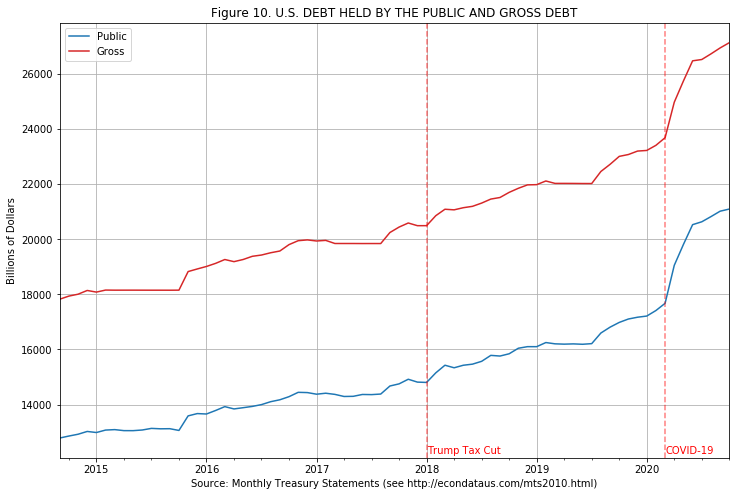

In [20]:
print('Table 10. U.S. DEBT HELD BY THE PUBLIC AND GROSS DEBT ($billions)')
zz0 = zz
zz0 = zz0.drop('Intragov', 1)
print(zz0)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
colors = ['C0','C3']
#ax.plot(zz0)
zz0[:].plot(ax = ax, color=colors)
ax.set_title('Figure 10. U.S. DEBT HELD BY THE PUBLIC AND GROSS DEBT')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Billions of Dollars')
ax.grid(zorder=0)
ytext=12200
ax.axvline(x='2018-1-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2018-1-15', y=ytext, s='Trump Tax Cut', color='red')
ax.axvline(x='2020-3-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2020-3-15', y=ytext, s='COVID-19', color='red')
ax.legend(zz0.columns)
savefig_debts = "mts" + yrmo_last + "debts.png"
if os.path.isfile(savefig_debts):
    os.remove(savefig_debts)
fig.savefig(savefig_debts)

As can be seen above, the gross federal debt rose to nearly \\$22 trillion at the end of 2018. This is the "federal debt" referenced in the CNSNews.com article. Also shown is the Debt Held by the Public which rose to over \\$16 trillion. The difference between these to measures of the debt is the Intragovernmental Holdings. This is described on [Wikipedia](https://en.wikipedia.org/wiki/Intragovernmental_holdings) as follows:

> In the United States, intragovernmental holdings are primarily composed of the Medicare Trust Fund, the Social Security Trust Fund, and Federal Financing Bank securities. A small amount of marketable securities are held by government accounts.

An interesting thing apparent in the graph is how the debt totals went flat for most of 2015 and 2017. This was caused by the debt ceiling, explained by [this article](https://www.thebalance.com/u-s-debt-ceiling-why-it-matters-past-crises-3305868) as follows:

> On March 15, 2015, the nation reached the debt ceiling of \\$18.113 trillion. In response, the Treasury Secretary stopped issuing new debt. He took extraordinary measures to keep the debt from exceeding the limit. For example, he stopped payments to federal employee retirement funds. He also sold investments held by those funds. He kept the debt under the limit until Congress passed the Bipartisan Budget Act of 2015 on November 15. The ceiling remained suspended until March 15, 2017. That means the Treasury Department could not allow the statutory debt limit to go one penny higher than the \\$19.808 trillion it was on that day.

> Treasury kept the debt under that ceiling until September 8, 2017.

As explained earlier in that article, that was the day that "President Trump signed a bill increasing the debt ceiling to December 8, 2017".

The following graph looks at the 12-month rolling change in these debts, along with the 12-month rolling sum of the deficit shown earlier.

Table 11. U.S. DEBTS AND DEFICIT: 12-Month Rolling Change ($billions)
              Public  Intragov     Gross   Deficit
2015-09-01  -338.876    12.330  -326.547  -438.899
2015-10-01  -203.600   -12.221  -215.822  -453.744
2015-11-01  -666.306  -155.466  -821.774  -461.475
2015-12-01  -648.570  -132.164  -780.735  -477.783
2016-01-01  -672.224  -258.309  -930.535  -405.074
...              ...       ...       ...       ...
2020-06-01 -4341.856  -112.102 -4453.958 -2981.573
2020-07-01 -4423.215   -79.370 -4502.584 -2924.870
2020-08-01 -4225.223   -43.146 -4268.369 -2924.538
2020-09-01 -4209.860   -16.130 -4225.989 -3131.917
2020-10-01 -4115.664   -11.403 -4127.067 -3281.521

[62 rows x 4 columns]


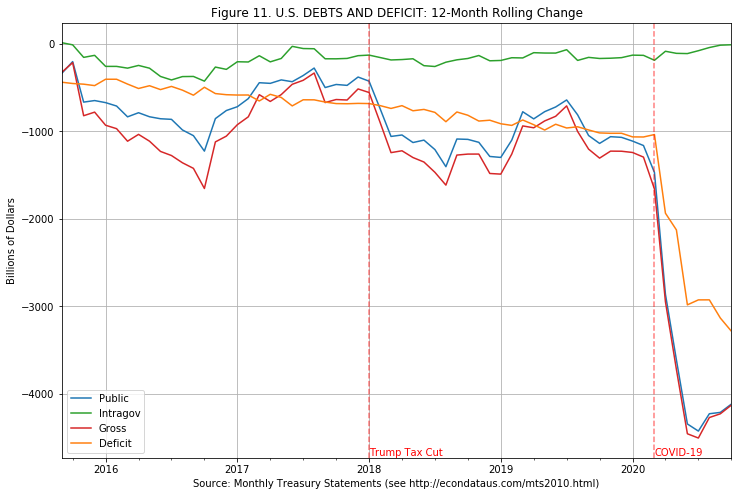

In [21]:
zzdiff = zz.diff()
zzdiff = -zzdiff.iloc[1:,]
zzdiff['Deficit'] = defs.iloc[0:,2]
zzrs = zzdiff.rolling(window=12).sum()
zzrs = zzrs.iloc[11:,]
#print(zz)
#print(zzdiff)

print('Table 11. U.S. DEBTS AND DEFICIT: 12-Month Rolling Change ($billions)')
print(zzrs)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
colors = ['C0','C2','C3','C1']
#ax.plot(zzrs)
#zzrs[['Public','Intragov','Gross','Deficit']].plot(ax = ax, color=colors)
zzrs[:].plot(ax = ax, color=colors)
ax.set_title('Figure 11. U.S. DEBTS AND DEFICIT: 12-Month Rolling Change')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Billions of Dollars')
ax.grid(zorder=0)
ytext=-4700
ax.axvline(x='2018-1-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2018-1-15', y=ytext, s='Trump Tax Cut', color='red')
ax.axvline(x='2020-3-1', linestyle='dashed', alpha=0.5, color='red')
ax.text(x='2020-3-15', y=ytext, s='COVID-19', color='red')
ax.legend(zzrs.columns)
savefig_debts12m = "mts" + yrmo_last + "debts12m.png"
if os.path.isfile(savefig_debts12m):
    os.remove(savefig_debts12m)
fig.savefig(savefig_debts12m)

As can be seen in the table and graph above, the 12-month changes in the public and gross debts were generally larger (negatively) than the 12-month rolling sum of the deficit. However, the change in the debts reached a minimum in October of 2015 and August of 2017. Non-coincidently, these were the final months of the debt crises after which the debts caught up and continued their prior trends. Since it's been well over a year since the 2017 debt ceiling crisis ended, the latest 12-month rolling changes should not be much affected by it. It's not surprising that the change in the gross federal debt is larger since it includes intergovernmental debt. However, it does seem strange that the change in the Debt Held by the Public is so much larger, at over \\$1.287 trillion. This would seem to merit further investigation.

In any event, one likely factor in the increasing debts and deficits is the Tax Cuts and Jobs Act of 2017.  The [aforementioned CNSNews.com article] (https://www.cnsnews.com/news/article/terence-p-jeffrey/1665484000000-feds-collect-record-individual-income-taxes-calendar) concluded:

> Even as inflation-adjusted individual income taxes increased from calendar year 2017 to calendar year 2018, total federal tax collections declined.

> In calendar 2017, total federal tax collections in constant December 2018 dollars were \\$3,407,503,740,000. In calendar year 2018, they were \\$3,330,470,000,000—a decline of $77,033,740,000 from 2017.

> Corporation income tax collections declined significantly from calendar year 2017 to calendar year 2018. In calendar 2017, the Treasury collected \\$290,978,980,000 in corporation income taxes (in constant December 2018 dollars). In calendar 2018, the Treasury collected \\$195,790,000,000 in corporation income taxes—a drop of \\$95,188,980,000.

> That was a decline in corporation income tax revenue of 32.7 percent.

Note: The Jupyter Notebook from which this post is generated can be found at http://econdataus.com/mts2010.ipynb. It is identical to the one at http://econdataus.com/mts1804.ipynb except that data on the debt was added in December 2018 and it has been updated through October 2020. Links to additional Jupyter Notebooks can be found at http://econdataus.com/jupyter.html. Finally, a copy of this specific page can be found at http://econdataus.com/mts2009.html and a copy of the most recent version of this page can always be found at http://econdataus.com/mts.html .
